In [1]:
import os
os.sys.path.append("C:\\Users\mplitt\MightyMorphingPhotonRangers")
import numpy as np
import matplotlib.pyplot as plt
import utilities as u
import preprocessing as pp
import behavior as b
import SimilarityMatrixAnalysis as sm
import scipy as sp
import PlaceCellAnalysis as pc
import matplotlib.gridspec as gridspec



%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
# load session data frame
df = pp.load_session_db()


df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
tracks = 'TwoTower_foraging'
df = df[df['Track'].str.contains(tracks,regex=True)]

G:\My Drive\VR_Data\TwoTower\behavior.sqlite
G:\My Drive\VR_Data\TwoTower\4222174.0\30_05_2019\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!
G:\My Drive\VR_Data\TwoTower\4222168.1\09_08_2019\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!
G:\My Drive\VR_Data\TwoTower\4222169.2\26_08_2019\TwoTower_Timeout_0.sqlite
file doesn't exist, errors to come!!!


In [3]:
morph_rare = ['4139265.3','4139265.4','4139265.5','4222168.1']
morph_familiar = ['4222153.1','4222153.2','4222153.3','4222174.1','4222154.1']

In [17]:
def num_int(mice, first_sess = []): 
    
    N = len(mice)
    NITrials,D = [] ,[]
    for i,(mouse,_fs) in enumerate(zip(mice,first_sess)):
        print(mouse)
        df_mouse = df[df['MouseName'].str.match(mouse)]
        nitrials,d = [],[]
        
        for sess_ind in range(_fs,df_mouse.shape[0]):
            sess = df_mouse.iloc[sess_ind]
            VRDat = pp.behavior_dataframe(sess['data file'])
            trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
            nitrials.append(((trial_info['morphs']>0) & (trial_info['morphs']<1)).sum())
            d.append(trial_info['morphs'].shape[0])
        
        NITrials.append(nitrials)
        D.append(d)
#         ax.plot(np.arange(8,8+len(ncells)),ncells,color=cm(np.float(i)/N),marker='x')
    return NITrials, D#, f,ax

In [18]:
rare_NTrials,rare_N = num_int(morph_rare,[2,2,2,0])

4139265.3
4139265.4
4139265.5
4222168.1


0
[45, 0, 0, 60, 60, 60, 60, 60]
1
[30, 0, 0, 60, 60, 60, 60, 60, 60]
2
[45, 0, 0, 60, 60, 60, 60, 60]
3
[30, 0, 29, 43, 48, 48, 48, 48]


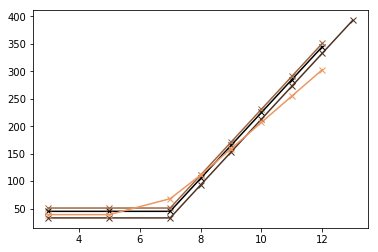

In [25]:
f,ax = plt.subplots()
sessNum = [3,5,7,8,9,10,11,12,13,14]
for i,(rm,n) in enumerate(zip(rare_NTrials,rare_N)):
    print(i)
    print(rm)
    ax.plot(sessNum[:len(rm)],np.cumsum(rm)+3*i,color=plt.cm.copper(np.float(i)/len(rare_NTrials)),marker='x')
#     ax[1].plot(sessNum[:len(rm)],np.cumsum(rm)/np.cumsum(n),color=plt.cm.copper(np.float(i)/len(rare_NTrials)),marker='x') # need to include non imaging trials for this calculation

f.savefig("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers_Manuscript\\Figures\\python_outputs\\int_trial_count_all.pdf",format="pdf")